# Sklearn

## sklearn.ensemble.RandomForestClassifier

документация:  http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [2]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализованы.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

In [11]:
bioresponse = pd.read_csv('bioresponse.csv')

In [12]:
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [13]:
bioresponse.shape

(3751, 1777)

In [14]:
target = bioresponse.Activity.values

In [9]:
print(f'bioresponse = 1: {target.mean():.2f}\nbioresponse = 0: {1-target.mean():.2f}')

bioresponse = 1: 0.54
bioresponse = 0: 0.46


In [15]:
X = bioresponse.iloc[:, 1:]

### Модель RandomForestClassifier

#### Кривые обучения для деревьев небольшой глубиной 

In [16]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)

In [17]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, X, target, 
                                                                       train_sizes=np.arange(0.1, 1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [18]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 250  750 1250 1750 2250]
[0.74933333 0.71333333 0.68453333 0.69104762 0.69022222]
[0.62356685 0.64195598 0.65369955 0.66248974 0.66728527]


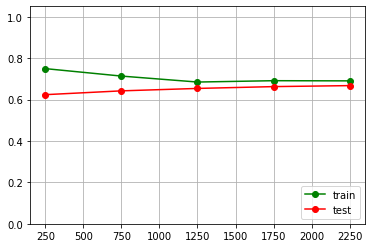

In [20]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

#### Кривые обучения для деревьев большей глубины

In [21]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [23]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, X, target, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

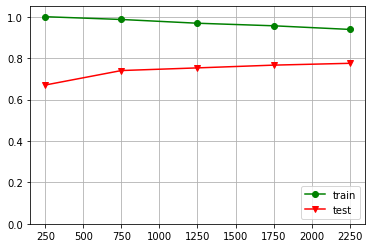

In [32]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r', marker='v', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')